<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

更新履歴：  
2023/10/15:
* 最小二乗法の関数をleast_squaresに変更
* 軸タイトルに日本語を表示する!pip install japanize-matplotlib 中止(都度実行する必要があるので)  

## 回帰  
例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

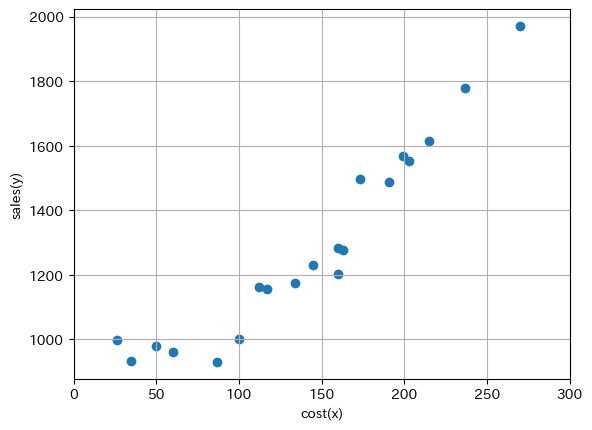

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("cost(x)")
plt.ylabel("sales(y)")
plt.scatter(x, y)

### 線形回帰モデル(単回帰分析)

$y = ax + b$ のaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 2
b= 800
J=1432989.0


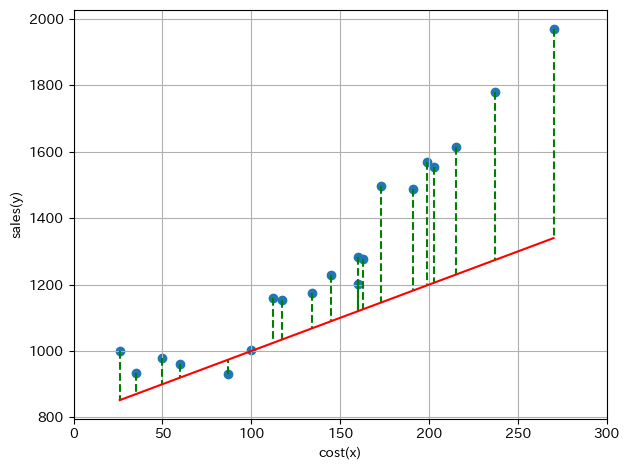

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

p = []
p.append(float(input('a= ')))  # 最初は2あたりから試す
p.append(float(input('b= ')))  # 最初は800あたりから試す

ylin = [estimate_func(p,i) for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

scipyライブラリを使って最小二乗法を実行してみる．



a=4.186227665537061,b=694.2336071727316
J=174154.4992816332


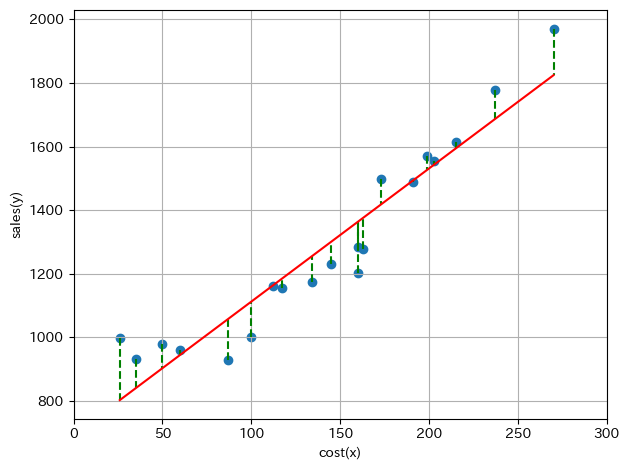

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 多項式回帰モデル(単回帰分析)

$y = ax^2 + bx + c$ のaとbとcを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 0.03
b= 0.2
c= 700
J=2473993.5859000003


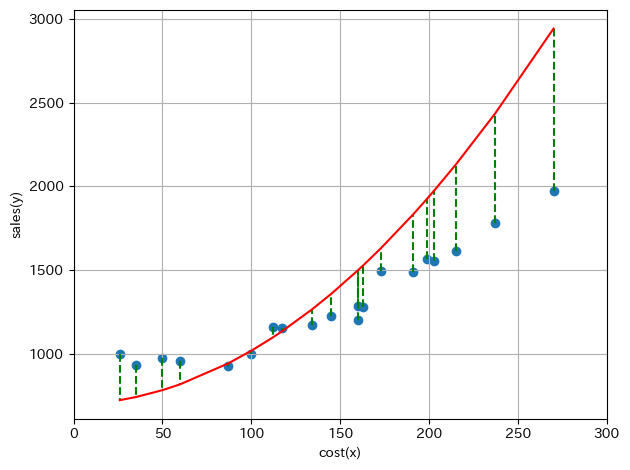

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

p = []
p.append(float(input('a= ')))  # 最初は0.03あたりから試す
p.append(float(input('b= ')))  # 最初は0.2あたりから試す
p.append(float(input('c= ')))  # 最初は700あたりから試す

ylin = [estimate_func(p,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

これもscipyライブラリを使って最小二乗法を実行してみる．

a=0.015897,b=-0.24561,c=932.57
J=58668.154113534634


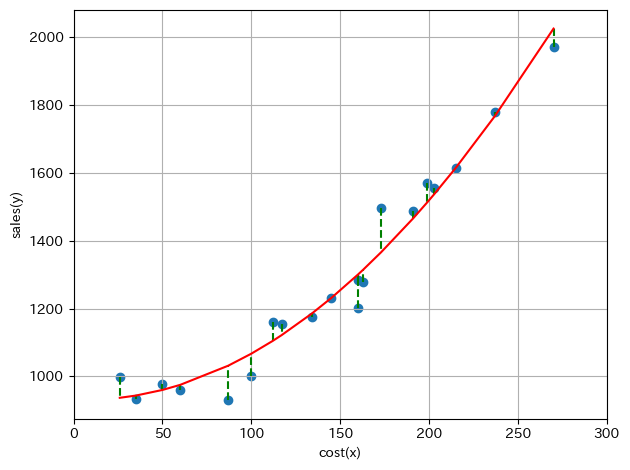

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0.03, 0.2, 700]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
print('a={:.5},b={:.5},c={:.5}'.format(a,b,c))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する (J = result.cost*len(x)でも直接計算可能)
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

**よっしゃ！6次関数にしてみよう！**  
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

a=2.9884e-11,b=-2.947e-08,c=1.1454e-05,d=-0.0022901,e=0.2691,f=-14.675,g=1227.0
J=46090.180389008616


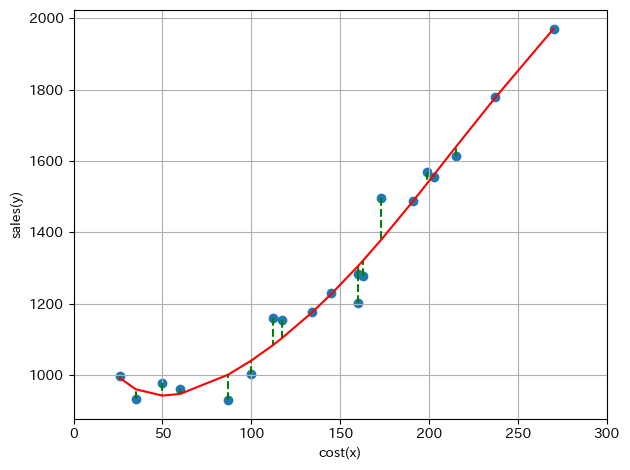

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あんまり変わらない…

## 分類  
例題：ある昆虫のホルモン成分AとBの含有量から，雄と雌を分類する


### まずデータを可視化する

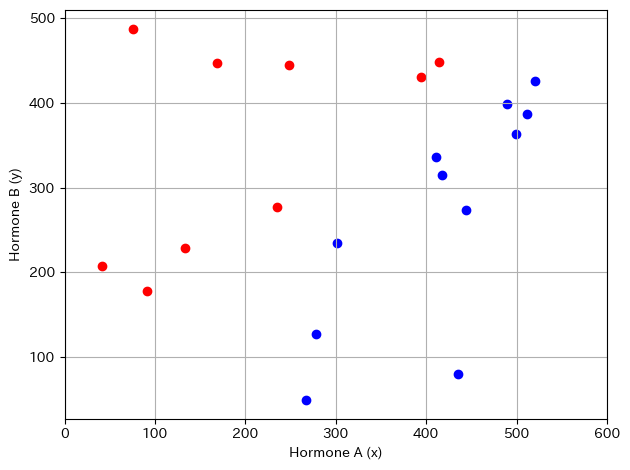

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
#axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 一次直線で分類してみる

$y = ax + b$ のaとbを変えて，緑の線で性別(赤と青の点)を分けてみよう．

a= 1.8
b= -100
3個が誤り


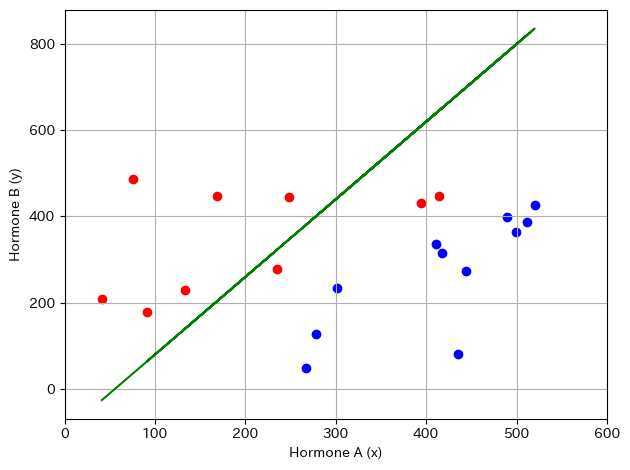

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

a = float(input('a= '))  # 最初は1.8あたりから試す
b = float(input('b= '))  # 最初は-100あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

residual = [p - q for p, q in zip(y, ylin)]

# 間違いのカウント
nerror = 0
for i in range(len(x)):
    if t[i]*residual[i]>0:
        nerror += 1
print('{}個が誤り'.format(nerror))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="g")
fig.tight_layout()  # レイアウトの設定
plt.show()

＜より複雑な分類に関する参考文献＞  
https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification


# 3.3 機械学習の基礎と展望(後半：損失，過学習…)

## 損失関数

二乗損失関数を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$1,4,8$であった．各々のモデルの二乗損失を求めよ．  
二乗損失関数は東大のスライドの通りとする．  
$l(f_w(x),y)=0.5(y-f_w(x))^2$

In [12]:
# 検算
y = 3
fw = float(input('fw(x)=)'))
print(0.5*(y-fw)**2)

fw(x)=)8
12.5


モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が小さいか考えよ．

ロジスティック損失を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$-1,4,8$であった．各々のモデルのロジスティック損失を求めよ．  
損失関数は東大のスライドの通りとする．$log$は自然対数．  
$l(f_w(x),y)=log(1+exp(-yf_w(x)))$

In [22]:
# 検算
import math as m
y = 3
fw = float(input('fw(x)=)'))
print(m.log(1+m.exp(-y*fw)))

fw(x)=)8
3.7751357594826464e-11


計算結果の「e-n」は$10^{-n}$の意味である．  
例：3.1415e-7 → $3.1415×10^{-7}$

モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が大きいか考えよ．実際の値と予測値の符号の違いにも注意する．

#### コラム：予測と正解の差を表す名称  
* 損失関数 (loss function)  
* 誤差関数 (error function)  
* コスト関数 (cost function)  
* 目的関数 (objective function)  

ぶっちゃけ，最初はこれらは同じだと思って結構です．いずれも訓練時に用いられ，パラメータを変化させることによりモデルを向上させます．小さくなるほど「誤差」が少なく，良いモデルといえます．具体的な関数の名称(例えば平方根とか)ではないことに注意してください．  
  
これらとは別に「評価関数」(evaluation function)という言葉があります．損失関数らとは「いつ使うか」が異なります．訓練データではなく，実際のデータ(この後に取り扱う「検証データ」)を用いて，そのモデルの良し悪しを評価するときに使用します．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/machinelearning-func)  
  
なお，この章では東大のスライドの表現「損失関数」を使用します．

## 過学習

回帰モデルの「6次関数」    
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$  
訓練データが10個(もとは20個)だったら？

a=-1.3129e-09,b=9.94e-07,c=-0.00029096,d=0.041399,e=-2.9221,f=94.018,g=-73.91
J=11115.64663955019


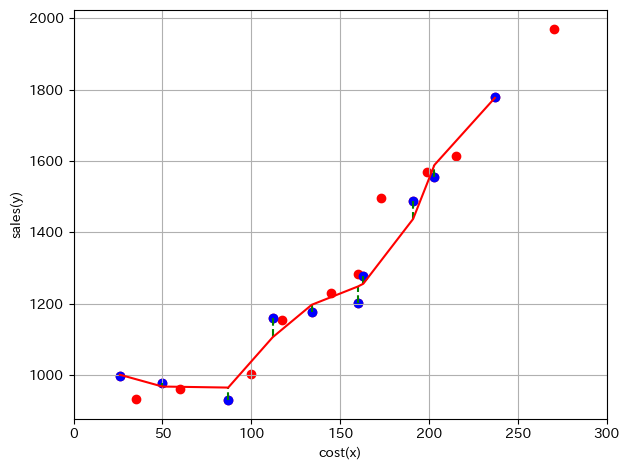

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# 10個に減らす
# xが広告費，yが売上高
x = [26,50,87,112,134,160,163,191,203,237]
y = [999,978,930,1161,1176,1203,1278,1488,1554,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

7個だったら？

a=-1.6995e-08,b=1.2589e-05,c=-0.0036578,d=0.52989,e=-39.8,f=1431.1,g=-1.7092e+04
J=2.638375281799137e-18


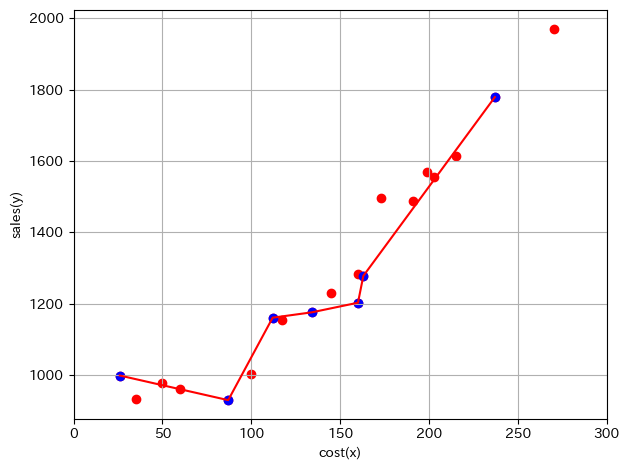

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# 7個に減らす
# xが広告費，yが売上高
x = [26,87,112,134,160,163,237]
y = [999,930,1161,1176,1203,1278,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

元の訓練データ(青色の点)が７つしかないのに，6次関数という複雑なモデルを用いた場合，訓練に用いたデータにはよく適合します(Jの値はほぼ０)  
しかし「まだ知らない」データ(橙色の点)には適合しません．  
損失はちいさいですが，これは良い学習といえるのでしょうか？？  
これを**「過学習 (overfit)」**といいます．

逆にモデルを単純化する．  
$y = ax + 1000$という，パラメータが1個しかないモデルを試してみよう．

J=511668.1879214037


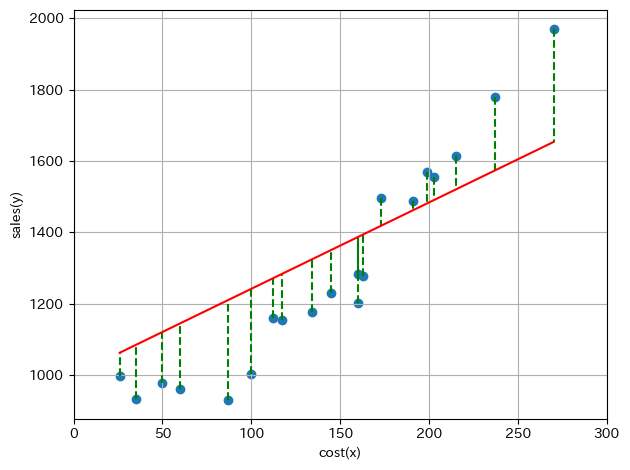

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x+1000)

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あまりに単純すぎるモデルを使うと，たとえ訓練データが多くてもフィットしません．これが過学習の逆の**「アンダーフィット (underfit)」**という現象です．